# 作业11

假设在红移为1处去观测一个现在红移为2的星系，其红移为多少？

In [1]:
def get_z_obs(z_emit, z_observer):
    return (1 + z_emit) / (1 + z_observer) - 1
get_z_obs(2, 1)

0.5

假设宇宙的膨胀是一个线性过程，请根据今天的哈勃常数估算宇宙的年龄。


In [2]:
from astropy import units as u
H0 = 70 * u.km / (u.s * u.Mpc)  # 假设宇宙线性膨胀，那么H(z)就假设为H0
# 计算哈勃时间（宇宙年龄），即哈勃常数的倒数
T_Hubble = (1 / H0).to(u.Gyr)
print(f"估计的宇宙年龄为：{T_Hubble:.4f}")

估计的宇宙年龄为：13.9685 Gyr


# 作业12

一团1000个太阳质量的中性气体云（全部为H原子）, 温度为30K，当云的密度大于多少时，气体云将发生塌缩？塌缩（自由下落）时标为多少？

分子云坍缩临界条件：$\frac{GMm_H}{R}=\frac{3KT}{2}$

密度$n$与半径$R$的关系：$n\dfrac{4\pi R^3}{3}m_H = 1000M_{\odot}$

In [3]:
import numpy as np
from astropy import units as u
from astropy.constants import k_B, G, M_sun
from astropy.units import Quantity

M_J = 1000 * M_sun
T = 30 * u.K
m_H = 1.674e-27 * u.kg  # 氢原子质量

R = (G*M_J*m_H)/(3/2*k_B*T)
print(f"R: {R.to(u.cm):.3e}")
n = M_J/((4/3)*np.pi*R**3*m_H)
print(f"大于rho_crit: {n.to(1/u.cm**3):.3f}时坍缩")

tau = np.sqrt(2*R**3/(G*M_J))
print(f"坍缩时标tau: {tau.to(u.Gyr):.3f}")

R: 3.576e+19 cm
大于rho_crit: 6.202 1 / cm3时坍缩
坍缩时标tau: 0.026 Gyr


这团气体中能形成的最大质量的恒星的质量是多少？

• 假设分子云中的恒星形成遵循Salpter初始质量函数（最小质量的恒星为0.08太阳质量）

$M_\text{total} = \frac{k_2}{0.35}(M_\text{min}^{-0.35} - M_\text{max}^{-0.35})$

这个应该不对

100%|██████████| 10000/10000 [00:03<00:00, 3075.55it/s]


Maximal mass: 192.16 M_sun


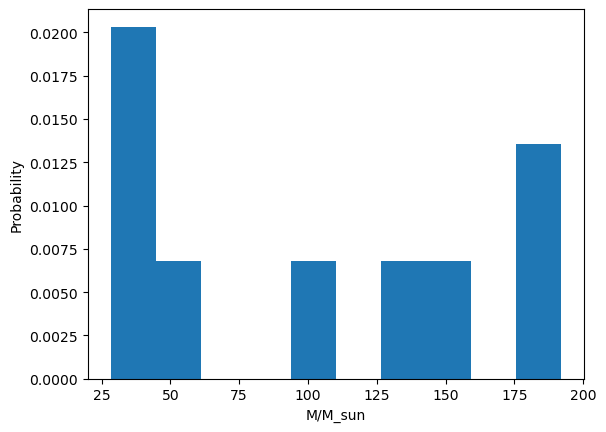

In [10]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
alpha = 2.35
M_min = 0.08
M_max_limit = 200
M_cloud = 1000
def log_prob(M):
    if M > M_min:
        return -2.35 * np.log(M)
    return -np.inf

nwalkers = 16
ndim = 1
nsteps = 10000
initial_positions = M_min + (M_max_limit - M_min) * np.random.rand(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)
sampler.run_mcmc(initial_positions, nsteps, progress=True)
samples = sampler.get_chain(flat=True)
cumulative_mass = np.cumsum(samples)
valid_samples = samples[cumulative_mass <= M_cloud]
max_mass = np.max(valid_samples)
print(f"Maximal mass: {max_mass:.2f} M_sun")
plt.hist(valid_samples, bins=10, density=True)
plt.xlabel("M/M_sun")
plt.ylabel("Probability")
plt.show()

#Mtot(M>M*)/Mtot(M<M*)v= M*/(1000-M*)

太阳中的氢大概有10%在主序阶段被燃烧，请估算太阳处于主序阶段的时间？太阳表面的温度大概是~5500K，请由此估算地球表面的温度。地球的反射率~0.3

In [12]:
from astropy.constants import M_sun, L_sun, c, au, R_earth, sigma_sb
M_H = 0.7346 * M_sun
M_H_burn = 0.1 * M_H
# 每千克氢核聚变释放的能量
energy_per_kg = 6e13 * u.J / u.kg
E_total = M_H_burn * energy_per_kg
t_main_seq = E_total / L_sun
print(f"太阳处于主序阶段的时间为：{t_main_seq.to(u.Gyr):.3f}")


太阳处于主序阶段的时间为：0.725 Gyr


# Etot 和energy_per_kg可以自己算

太阳辐射到地球的能量为$(1-0.3)*\frac{L_{\odot}}{4\pi d^2} \pi R^2$，地球到太阳的距离为1au

和地球辐射能量为$4\pi R^2 \sigma T_{\text{earth}}^4$相等


In [13]:
import numpy as np
from astropy import units as u
from astropy.constants import L_sun, au, sigma_sb
A = 0.3
d = au
T_earth = (((1 - A) * L_sun) / (16 * np.pi * sigma_sb * d**2))**0.25
print(f"地球的温度约为: {T_earth:.2f}")

地球的温度约为: 254.59 K


# 可以直接从太阳的温度和视面积计算